In [1]:
from clr import *
from simulate import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Scenario 1: Users aren't aware of the library

In [2]:
params = {
    'app_user_penetration': .5, # each app is used by half the users
    'lib_app_penetration': 1,
    'apps_built_per_app_dev': 1,
    'n_users': 1 * 10**2, # 100
    'n_app_devs': 1 * 10**1, # 10
    'n_lib_devs': 1 * 10**0, # 1
    'face_app_value_to_user': 10, # total value of each app to a user
    'user_lib_awareness': 0, # users don't know (or care) about the contribution libs make to the apps they use
    'app_dev_user_awareness': True, # whether app devs know how much users value libs 
    'true_lib_value_ratio': .10, # each lib has uniform value
    'contribution_ratio': 1, # proportion of the known value received from a given entity (e.g. app or lib) that an individual (e.g. user or dev) contributes to that entity
    'clr_budget': 1000
}

results, details = run_simulation(params)
results

{'true app value': 4500.0,
 'true lib value': 500.0,
 'lib value ratio': 0.1,
 'lib matching ratio': 0.02,
 'lib direct funding ratio': 0.091,
 'lib total funding ratio': 0.08,
 'app funds received': 5980,
 'lib funds received': 519.61,
 'per app net funding': 548.04,
 'per lib net funding': 519.61}

### Scenario 2: Users are aware of the library and its value
Users split their contributions across apps and the library according to the true value created by each (9:1 in this case)

Apps receive less funding from users, and therefore don't contribute to the library.

In [3]:
params2 = {
    'app_user_penetration': .5, # each app is used by half the users
    'lib_app_penetration': 1,
    'apps_built_per_app_dev': 1,
    'n_users': 1 * 10**2, # 100
    'n_app_devs': 1 * 10**1, # 10
    'n_lib_devs': 1 * 10**0, # 1
    'face_app_value_to_user': 10, # total value of each app to a user
    'user_lib_awareness': 1, # users don't know (or care) about the contribution libs make to the apps they use
    'app_dev_user_awareness': True, # whether app devs know how much users value libs 
    'true_lib_value_ratio': .10, # each lib has uniform value
    'contribution_ratio': 1, # proportion of the known value received from a given entity (e.g. app or lib) that an individual (e.g. user or dev) contributes to that entity
    'clr_budget': 1000
}

results2, details2 = run_simulation(params2)
results2

{'true app value': 4500.0,
 'true lib value': 500.0,
 'lib value ratio': 0.1,
 'lib matching ratio': 0.182,
 'lib direct funding ratio': 0.1,
 'lib total funding ratio': 0.114,
 'app funds received': 5318,
 'lib funds received': 681.82,
 'per app net funding': 531.82,
 'per lib net funding': 681.82}

### Scenario 3: Users are *partially* aware of the library's value
Intermediate between Scenario 1 and Scenario 2

Users split their contributions between apps and the library according to their perceived value of each (9.5:0.5 in this case)

Apps are able to contribute partially to the library

In [4]:
params3 = {
    'app_user_penetration': .5, # each app is used by half the users
    'lib_app_penetration': 1,
    'apps_built_per_app_dev': 1,
    'n_users': 1 * 10**2, # 100
    'n_app_devs': 1 * 10**1, # 10
    'n_lib_devs': 1 * 10**0, # 1
    'face_app_value_to_user': 10, # total value of each app to a user
    'user_lib_awareness': .5, # users don't know (or care) about the contribution libs make to the apps they use
    'app_dev_user_awareness': True, # whether app devs know how much users value libs 
    'true_lib_value_ratio': .10, # each lib has uniform value
    'contribution_ratio': 1, # proportion of the known value received from a given entity (e.g. app or lib) that an individual (e.g. user or dev) contributes to that entity
    'clr_budget': 1000
}

results3, details3 = run_simulation(params3)
results3

{'true app value': 4500.0,
 'true lib value': 500.0,
 'lib value ratio': 0.1,
 'lib matching ratio': 0.154,
 'lib direct funding ratio': 0.095,
 'lib total funding ratio': 0.105,
 'app funds received': 5596,
 'lib funds received': 654.24,
 'per app net funding': 534.58,
 'per lib net funding': 654.24}

In [5]:
params4 = params3.copy()
p = 'user_lib_awareness'
params4[p] = 20

In [6]:
params4

{'app_user_penetration': 0.5,
 'lib_app_penetration': 1,
 'apps_built_per_app_dev': 1,
 'n_users': 100,
 'n_app_devs': 10,
 'n_lib_devs': 1,
 'face_app_value_to_user': 10,
 'user_lib_awareness': 20,
 'app_dev_user_awareness': True,
 'true_lib_value_ratio': 0.1,
 'contribution_ratio': 1,
 'clr_budget': 1000}

## Impact of level of user awareness of the library

In [8]:
df = multi_sim(params, 'user_lib_awareness', r)

''

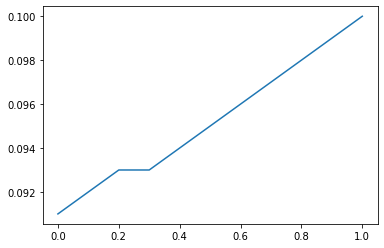

In [9]:
plt.plot(df.index, df['lib direct funding ratio'])
;

''

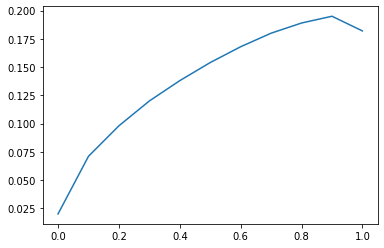

In [10]:
plt.plot(df.index, df['lib matching ratio'])
;

''

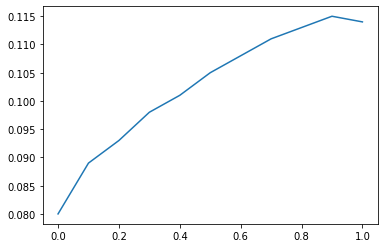

In [11]:
plt.plot(df.index, df['lib total funding ratio'])
;